In [2]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import colors as mcolors

import plotly.graph_objects as go
from scipy.stats import linregress
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.cluster import KMeans
from tabulate import tabulate
from collections import Counter


In [8]:
df = pd.read_excel(r"C:\Users\AORUS 15\Desktop\Project\Project 2-REALM OF\REALM of - SỔ QUỸ  (1).xlsx")


# Initial Data Analysis

In [18]:
df.head(10)

,ngày_tạo,mã_đơn_hàng,platform,tên_khách_hàng,địa_chỉ,thành_phố_tỉnh,người_tạo_đơn,sku,tên_sản_phẩm,size,số_lượng,giá_trị_đơn,hình_thức_thanh_toán
0,2025-02-03,SPXVN057972764152,Shopee,Hồ Khánh Linh,"D2 Đường Giảng Võ, Khu tập thể Giảng Võ,Phường...",Hà Nội,Thức,HD2,"""REALM OF"" 3D EMBROIDERY HOODIE GREY",S,1,1380000.0,chuyển khoản
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,HD2,"""REALM OF"" 3D EMBROIDERY HOODIE GREY",M,1,NaN,NaN
2,2025-02-03,SPXVN055688333422,Shopee,Shopee International Platform,"nhà kho D2, lô D2, đường N13, Khu công nghiệp ...",Thành phố Hồ Chí Minh,Thức,LP2,"""REALM OF"" SWEATPANTS GREY",S,1,650000.0,chuyển khoản
3,2025-02-03,SPXVN052348805682,Shopee,Thao Vy,"26,B2 Phường Phú Thứ,Quận Cái Răng",Cần Thơ,Thức,HD2,"""REALM OF"" 3D EMBROIDERY HOODIE GREY",S,1,616000.0,chuyển khoản
4,2025-02-03,SPXVN059659014252,Shopee,Mai Thị Kim Phụng,"12/3 khu phố 6, Phường Tân Hoà",Biên Hòa,Thức,TS2,"""REALM OF"" MAP TEE WHITE",S,1,390000.0,chuyển khoản
5,2025-02-03,SPXVN054643705422,Shopee,Hiền Anh,"Toà nhà Hoà Bình Freen, ngõ 376 đường Bưởi, Ph...",Hà Nội,Thức,SP2,"""REALM OF"" SWEATJORTS GREY",S,1,650000.0,chuyển khoản
6,2025-02-03,SPXVN057450450372,Shopee,Nguyễn Thị Ngọc Mai,"Toà B CC Sunsquare, 21 Lê Đức Thọ,Phường Mỹ Đĩ...",Hà Nội,Thức,SP1,"""REALM OF"" SWEATJORTS BLACK",S,1,476000.0,chuyển khoản
7,2025-02-03,SPXVN052646891292,Shopee,Thanh Ngân,"322A Hoà Hưng, Phường 13, Quận 10",Thành phố Hồ Chí Minh,Thức,SP2,"""REALM OF"" SWEATJORTS GREY",L,1,530000.0,chuyển khoản
8,2025-02-03,SPXVN059576670522,Shopee,Linh Đan,"54 Diệp Minh Châu, Phường Tân Sơn Nhì. Quận Tâ...",Thành phố Hồ Chí Minh,Thức,TS3,"""REALM OF"" RAGLAN LAYERED TEE",S,1,442000.0,chuyển khoản
9,2025-02-03,SPXVN051611484561,Shopee,Minh Phạm,"145 Vệ Hồ,Phường Xuân La, Quận Tây Hồ",Hà Nội,Thức,LP1,"""REALM OF"" SWEATPANTS NIGHT",L,1,586500.0,chuyển khoản


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   ngày_tạo              395 non-null    datetime64[ns]
 1   mã_đơn_hàng           362 non-null    object        
 2   platform              516 non-null    object        
 3   tên_khách_hàng        384 non-null    object        
 4   địa_chỉ               383 non-null    object        
 5   thành_phố_tỉnh        383 non-null    object        
 6   người_tạo_đơn         411 non-null    object        
 7   sku                   566 non-null    object        
 8   tên_sản_phẩm          566 non-null    object        
 9   size                  566 non-null    object        
 10  số_lượng              568 non-null    int64         
 11  giá_trị_đơn           409 non-null    float64       
 12  hình_thức_thanh_toán  560 non-null    object        
dtypes: datetime64[ns](1)

In [20]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
ngày_tạo,395,2025-03-17 06:51:56.962025472,2025-02-03 00:00:00,2025-02-18 00:00:00,2025-03-16 00:00:00,2025-04-05 00:00:00,2025-05-26 00:00:00,NaN
số_lượng,568.0,1.010563,1.0,1.0,1.0,1.0,3.0,0.132382
giá_trị_đơn,409.0,623398.281174,0.0,296650.0,560000.0,720000.0,4399000.0,517311.450014


In [21]:
df.describe(include='object').T

,count,unique,top,freq
mã_đơn_hàng,362,347,Hỏa tốc,8
platform,516,4,Shopee,285
tên_khách_hàng,384,298,T******n,8
địa_chỉ,383,358,"R103, Gia Lâm, Đa Tốn, Hà Nội, Xã Đa Tốn, Huyệ...",5
thành_phố_tỉnh,383,55,Thành phố Hồ Chí Minh,171
người_tạo_đơn,411,4,Khương,194
sku,566,14,HD2,78
tên_sản_phẩm,566,23,"""REALM OF"" 3D EMBROIDERY HOODIE GREY",78
size,566,4,M,199
hình_thức_thanh_toán,560,2,chuyển khoản,306


Làm Sạch Dữ Liệu (Data Cleaning)

In [9]:
# Xóa dòng thiếu ngày và mã đơn hàng (quan trọng)
df_clean = df.dropna(subset=['ngày_tạo', 'mã_đơn_hàng'])

# Chuyển ngày_tạo sang datetime
df_clean['ngày_tạo'] = pd.to_datetime(df_clean['ngày_tạo'], errors='coerce')

# Tạo cột Total_Amount = số_lượng * giá_trị_đơn
df_clean['total_amount'] = df_clean['số_lượng'] * df_clean['giá_trị_đơn']

# Kiểm tra missing values
print(df_clean.isnull().sum())


ngày_tạo                0
mã_đơn_hàng             0
platform                0
tên_khách_hàng          0
địa_chỉ                 1
thành_phố_tỉnh          1
người_tạo_đơn           1
sku                     0
tên_sản_phẩm            0
size                    1
số_lượng                0
giá_trị_đơn             0
hình_thức_thanh_toán    0
total_amount            0
dtype: int64


In [10]:
# Fill giá_trị_đơn bằng giá trung bình (hoặc median nếu muốn)
mean_price = df_clean['giá_trị_đơn'].mean()
df_clean['giá_trị_đơn'].fillna(mean_price, inplace=True)

# Cập nhật lại total_amount
df_clean['total_amount'] = df_clean['số_lượng'] * df_clean['giá_trị_đơn']

In [11]:
df_clean['địa_chỉ'].fillna('Unknown', inplace=True)
df_clean['thành_phố_tỉnh'].fillna('Unknown', inplace=True)
df_clean['người_tạo_đơn'].fillna('Unknown', inplace=True)


In [12]:
df_clean['size'].fillna('Unknown', inplace=True)

In [13]:
print(df_clean.isnull().sum())


ngày_tạo                0
mã_đơn_hàng             0
platform                0
tên_khách_hàng          0
địa_chỉ                 0
thành_phố_tỉnh          0
người_tạo_đơn           0
sku                     0
tên_sản_phẩm            0
size                    0
số_lượng                0
giá_trị_đơn             0
hình_thức_thanh_toán    0
total_amount            0
dtype: int64


In [14]:
# Kiểm tra duplicate toàn bộ dòng
duplicate_rows = df_clean[df_clean.duplicated()]
print(f"Số dòng duplicate toàn bộ: {duplicate_rows.shape[0]}")


Số dòng duplicate toàn bộ: 0


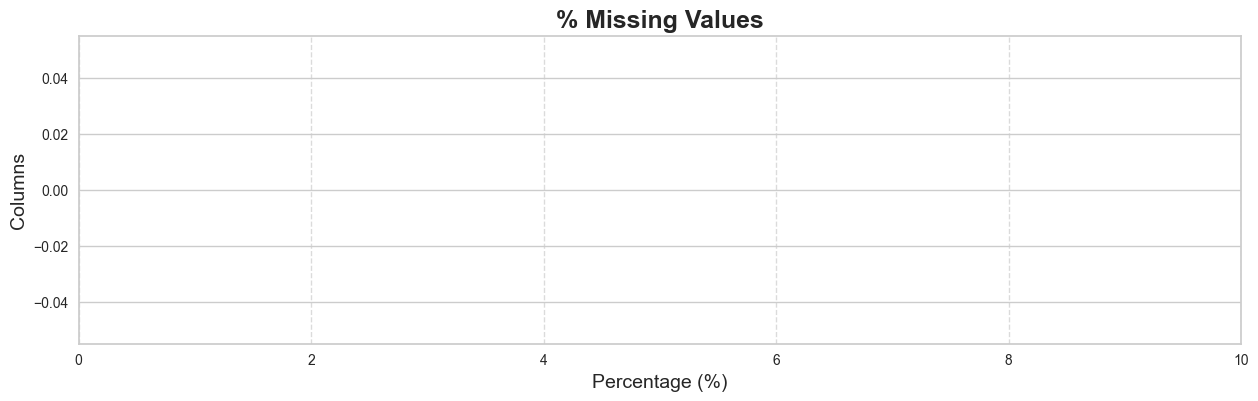

In [16]:
import matplotlib.pyplot as plt

# Tính số lượng và % missing values cho mỗi cột
missing_values = df_clean.isnull().sum()
percentage_missing = (missing_values[missing_values > 0] / df_clean.shape[0]) * 100

# Sort giảm dần cho dễ xem
percentage_missing.sort_values(ascending=True, inplace=True)

# Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(15, 4))
ax.barh(percentage_missing.index, percentage_missing, color='#ff6200')

# Hiển thị % trên cột
for i, (value, name) in enumerate(zip(percentage_missing, percentage_missing.index)):
    ax.text(value + 0.2, i, f"{value:.1f}%", ha='left', va='center', fontweight='bold', fontsize=12, color='red')

# Giới hạn trục X (có thể chỉnh nếu dữ liệu ít missing)
ax.set_xlim([0, 10])

# Thêm tiêu đề và nhãn trục
plt.title("% Missing Values", fontweight='bold', fontsize=18)
plt.xlabel('Percentage (%)', fontsize=14)
plt.ylabel('Columns', fontsize=14)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


EDA

In [ ]:
# Tổng doanh thu toàn bộ từ tháng 2-5
total_revenue = df_clean['total_amount'].sum()
print(f"Tổng doanh thu: {total_revenue:,.0f} VND")

# Tổng số lượng bán được từ tháng 2-5
total_quantity = df_clean['số_lượng'].sum()
print(f"Tổng số sản phẩm bán được: {total_quantity:,}")


Tổng doanh thu: 236,425,897 VND
Tổng số sản phẩm bán được: 366


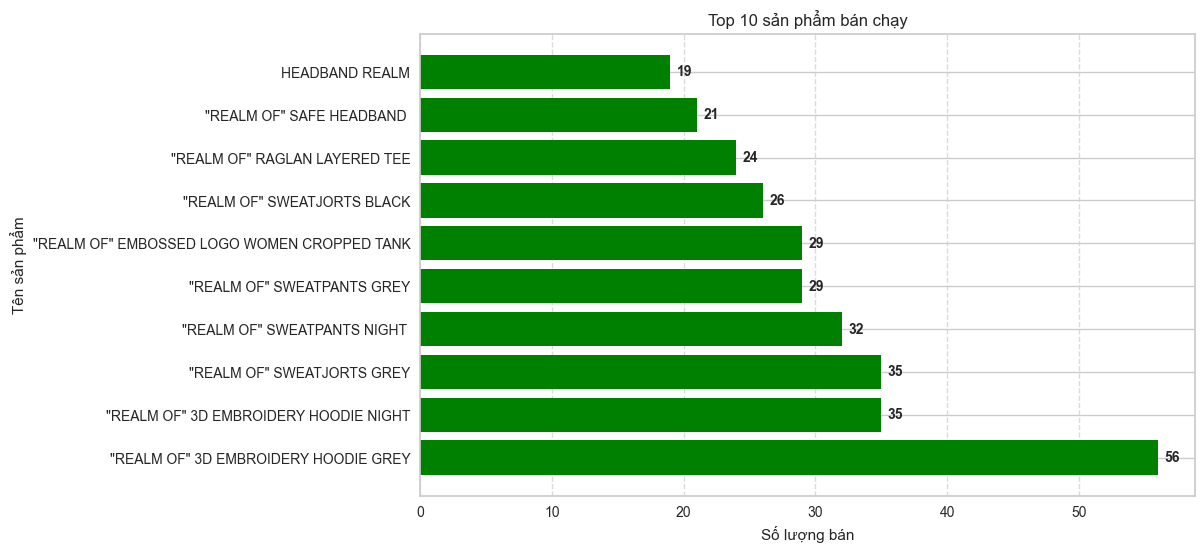

In [ ]:
import matplotlib.pyplot as plt

top_products = df_clean.groupby('tên_sản_phẩm')['số_lượng'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
bars = plt.barh(top_products.index, top_products.values, color='green')

plt.title('Top 10 sản phẩm bán chạy')
plt.xlabel('Số lượng bán')
plt.ylabel('Tên sản phẩm')

# Thêm số trên từng bar
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{int(width)}', va='center', fontsize=10, fontweight='bold')

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
revenue_by_city = df_clean.groupby('thành_phố_tỉnh')['total_amount'].sum().sort_values(ascending=False)


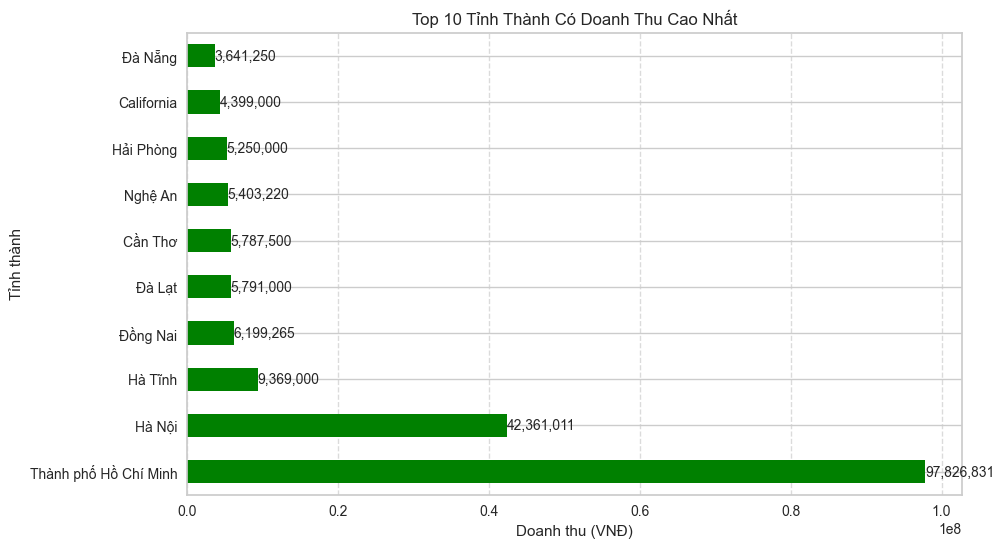

In [ ]:
top_10_cities = revenue_by_city.head(10)

plt.figure(figsize=(10,6))
top_10_cities.plot(kind='barh', color='green')
plt.title('Top 10 Tỉnh Thành Có Doanh Thu Cao Nhất')
plt.xlabel('Doanh thu (VNĐ)')
plt.ylabel('Tỉnh thành')

# Hiển thị giá trị trên cột
for index, value in enumerate(top_10_cities):
    plt.text(value, index, f'{int(value):,}', va='center', fontsize=10)

plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


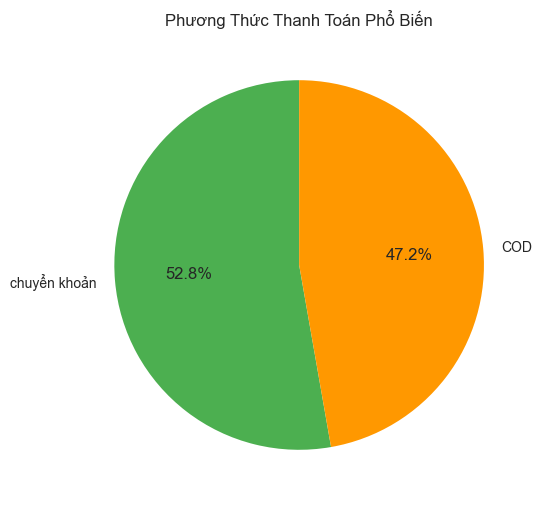

In [ ]:
payment_methods = df_clean['hình_thức_thanh_toán'].value_counts()

payment_methods.plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), startangle=90, colors=['#4CAF50', '#FF9800', '#2196F3'])
plt.title('Phương Thức Thanh Toán Phổ Biến')
plt.ylabel('')
plt.show()


In [ ]:
df_clean['year'] = df_clean['ngày_tạo'].dt.year
df_clean['month'] = df_clean['ngày_tạo'].dt.month

In [ ]:
revenue_by_month = df_clean.groupby(['year', 'month'])['total_amount'].sum().reset_index()

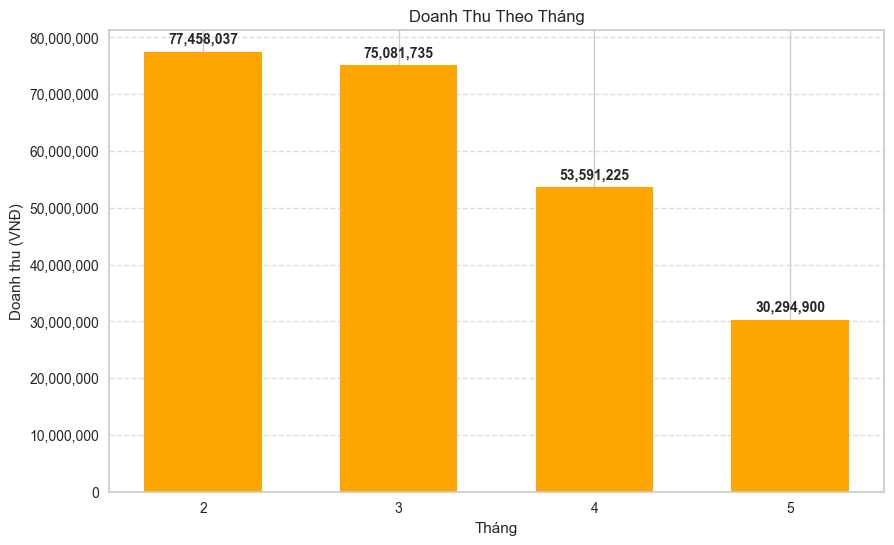

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

plt.figure(figsize=(10,6))
bars = plt.bar(revenue_by_month['month'], revenue_by_month['total_amount'], color='orange', width=0.6)

plt.title('Doanh Thu Theo Tháng')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu (VNĐ)')

# Hiển thị số tiền rõ ràng trên trục Y
ax = plt.gca()
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Hiển thị rõ các tháng (2,3,4,5)
plt.xticks([2,3,4,5])

# Thêm số trên mỗi cột
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1e6, f'{int(height):,}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


RFM

In [ ]:
from datetime import timedelta

# Xác định ngày tham chiếu (max ngày + 1 ngày)
today = df_clean['ngày_tạo'].max() + timedelta(days=1)

# Tính RFM
rfm = df_clean.groupby('tên_khách_hàng').agg({
    'ngày_tạo': lambda x: (today - x.max()).days,  # Recency: Số ngày kể từ đơn hàng gần nhất
    'mã_đơn_hàng': 'nunique',                     # Frequency: Số lần mua
    'total_amount': 'sum'                         # Monetary: Tổng tiền đã mua
}).reset_index()

# Đổi tên cột
rfm.columns = ['tên_khách_hàng', 'recency', 'frequency', 'monetary']

# Xem kết quả
rfm.head()


,tên_khách_hàng,recency,frequency,monetary
0,A*****h,49,1,99000.0
1,Anh Le,75,1,300000.0
2,B******n,68,5,2715220.0
3,B******ư,60,1,690000.0
4,B*****i,68,1,199000.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
rfm_scaled = scaler.fit_transform(rfm[['recency', 'frequency', 'monetary']])


K-means

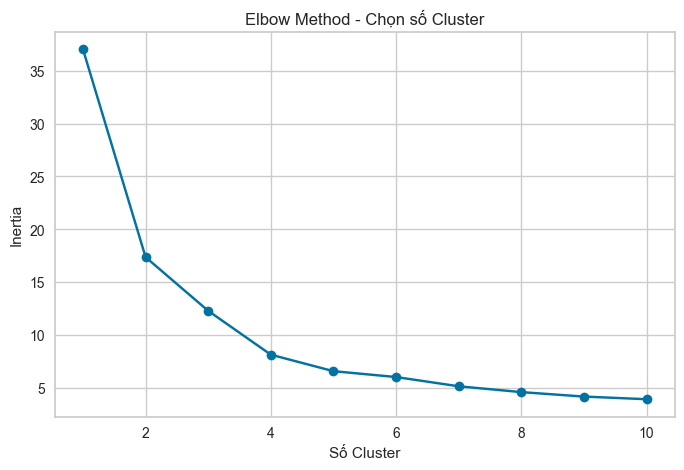

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertia, marker='o')
plt.title('Elbow Method - Chọn số Cluster')
plt.xlabel('Số Cluster')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [ ]:
k = 3  # hoặc số cluster anh thấy phù hợp sau Elbow
kmeans = KMeans(n_clusters=k, random_state=42)
rfm['cluster'] = kmeans.fit_predict(rfm_scaled)

# Xem kết quả phân cụm
rfm.head()


,tên_khách_hàng,recency,frequency,monetary,cluster
0,A*****h,49,1,99000.0,0
1,Anh Le,75,1,300000.0,1
2,B******n,68,5,2715220.0,2
3,B******ư,60,1,690000.0,0
4,B*****i,68,1,199000.0,1


In [ ]:
# Không cần import ace_tools gì cả!
import pandas as pd

# Format lại bảng cluster summary cho đẹp
summary = rfm.groupby('cluster').agg({
    'recency': ['mean', 'min', 'max'],
    'frequency': ['mean', 'min', 'max'],
    'monetary': ['mean', 'min', 'max'],
    'tên_khách_hàng': 'count'
}).reset_index()

# Làm đẹp tiêu đề cột
summary.columns = ['Cluster', 
                   'Recency_Mean', 'Recency_Min', 'Recency_Max',
                   'Frequency_Mean', 'Frequency_Min', 'Frequency_Max',
                   'Monetary_Mean', 'Monetary_Min', 'Monetary_Max',
                   'Customer_Count']

# Format số tiền dễ đọc
summary['Monetary_Mean'] = summary['Monetary_Mean'].apply(lambda x: f"{x:,.0f}")
summary['Monetary_Min'] = summary['Monetary_Min'].apply(lambda x: f"{x:,.0f}")
summary['Monetary_Max'] = summary['Monetary_Max'].apply(lambda x: f"{x:,.0f}")

# Hiển thị bảng
print(summary)


   Cluster  Recency_Mean  Recency_Min  Recency_Max  Frequency_Mean  \
0        0     38.490909            1           67        1.154545   
1        1     96.852349           68          113        1.067114   
2        2     40.523810           10           70        3.476190   

   Frequency_Min  Frequency_Max Monetary_Mean Monetary_Min Monetary_Max  \
0              1              3       746,903            0    2,144,000   
1              1              3       652,836            0    2,068,537   
2              1              8     2,713,998      970,000    4,574,125   

   Customer_Count  
0             110  
1             149  
2              21  


## Nhận xét & Kết luận Phân Cụm Khách Hàng (RFM Analysis)

### Phân cụm khách hàng đã chia thành 3 nhóm rõ rệt:

| Cluster | Recency (Ngày trung bình) | Frequency (Số lần mua trung bình) | Monetary (Chi tiêu trung bình) | Số lượng khách hàng | Đặc điểm |
| :---: | :---: | :---: | :---: | :---: | :--- |
| 0 | 38.49 | 1.15 | 746,903 VND | 110 | Khách mua đều, giá trị trung bình |
| 1 | 96.85 | 1.06 | 652,836 VND | 149 | Khách đã lâu không mua, cần kích hoạt lại |
| 2 | 40.52 | 3.48 | 2,713,998 VND | 21 | Khách VIP, chi tiêu cao, mua thường xuyên |

### Nhận xét chi tiết:

- **Cluster 2 (VIP Customers)**: Nhóm khách hàng chi tiêu cao nhất, mua nhiều lần, giá trị đơn hàng lớn. Đây là nhóm quan trọng cần ưu tiên chăm sóc, upsell và tặng voucher tri ân.
- **Cluster 0 (Regular Customers)**: Nhóm khách hàng mua đều đặn nhưng chi tiêu chưa cao. Cần đẩy mạnh chiến dịch upsell, combo deal để tăng giá trị đơn hàng.
- **Cluster 1 (Inactive Customers)**: Nhóm khách hàng đã lâu không mua hàng, có tần suất mua thấp. Cần thực hiện chiến dịch remarketing, email nhắc nhở, ưu đãi đặc biệt để kích thích họ quay lại mua hàng.

### Recommendation (Đề xuất chiến lược):

- **Cluster 2 (VIP)**: Gửi quà tri ân, giảm giá độc quyền, early access sản phẩm mới.
- **Cluster 0 (Regular)**: Chạy chương trình upsell/cross-sell, giảm giá cho đơn hàng trên mức trung bình.
- **Cluster 1 (Inactive)**: Tạo chiến dịch remarketing qua email/SMS, nhấn mạnh ưu đãi giới hạn, quà tặng comeback.

### Tóm lại:

RFM Analysis giúp phân loại khách hàng theo giá trị và hành vi mua hàng, từ đó doanh nghiệp có thể tối ưu hóa chiến lược marketing, tăng doanh thu và giữ chân khách hàng hiệu quả hơn.
